In [2]:
%pylab inline
import sklearn.metrics
import scipy.io
from sklearn import svm
DEBUG=False
digit_data_test = scipy.io.loadmat("data/digit-dataset/test.mat")
digit_data_train = scipy.io.loadmat("data/digit-dataset/train.mat")

test_img= digit_data_test['test_images']
train_img= digit_data_train['train_images']
train_label= digit_data_train['train_labels']

#Flatten the 28x28 images into 784 pixel long vectors 
train_img_flat=[]
for i in np.arange(shape(train_img)[2]):
    train_img_flat.append(train_img[:,:,i].flatten())
train_img_flat= np.array(train_img_flat)

# Code written by Kunal Marwaha on Piazza
import math
#benchmark.m, converted
def benchmark(pred_labels, true_labels):
    errors = pred_labels != true_labels
    err_rate = sum(errors) / float(len(true_labels))
    indices = errors.nonzero()
    return err_rate, indices
#montage_images.m, converted
def montage_images(images):
    num_images=min(1000,np.size(images,2))
    numrows=math.floor(math.sqrt(num_images))
    numcols=math.ceil(num_images/numrows)
    img=np.zeros((numrows*28,numcols*28));
    for k in range(num_images):
        r = k % numrows
        c = k // numrows
        img[r*28:(r+1)*28,c*28:(c+1)*28]=images[:,:,k];
    return img

Populating the interactive namespace from numpy and matplotlib


__Problem 3.__ Explain why cross-validation helps. Implement cross- validation5 and find the optimal value of the parameter C using 10- fold cross-validation on the training set with 10,000 examples. Train a linear SVM with this value of C. Please report your C value, the validation error rate, and your Kaggle score. If you used additional features, please (briefly) describe what features you added, removed, or modified.

Cross validation is important because often we have a machine learning model that depends on some parameter that we want to tune to optimize (speed, accuracy ..etc) . So cross validation splits up our sample so that we can conduct these experiments with different values of the model parameter and then it returns a score computed from the  mean squared error that enable us to evaluate whether that is a good value to use for the model or find the best parameter that gives the most accurate result.

Optimal C value $\approx$ 1/N , so the good ones is like around 0.0001

In [3]:
#Setting up the problem k=10-fold cross validation
N_total = 10000
data = train_img_flat[:N_total]
k=10
batch_size =shape(data)[0]/k
if (DEBUG): print batch_size
#Creating a list of 10000 random numbers
s = set()
while len(s) < N_total:
    s.add(random.randint(60000))
rand_idx=np.array(list(s))
np.random.shuffle(rand_idx)

In [127]:
print shape(train_img_flat)
print shape(train_label)

(60000, 784)
(60000, 1)


In [130]:
type(train_img_flat)

numpy.ndarray

In [131]:
train_img_flat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [126]:
DEBUG = True
#Creating a gigantic array of all the training sets, grouped by each batch (fold)
mega_train_subset=[]
mega_labels_subset=[]
#Looping through each fold
for i in np.arange(k)+1:
#     print "Batch {}".format(i)
    train_subset = []
    labels_subset = []
#     print (i-1)*batch_size
#     print i*batch_size
#     print shape(rand_idx[(i-1)*batch_size:i*batch_size])
    #Merge data for each batch into one
    for idx in rand_idx[(i-1)*batch_size:i*batch_size]:
        train_subset.append(train_img_flat[idx])
        labels_subset.append(train_label[:,0][idx])
    train_subset = np.array(train_subset)
    labels_subset = np.array(labels_subset)
    mega_train_subset.append(train_subset)
    mega_labels_subset.append(labels_subset)
mega_train_subset = np.array(mega_train_subset)
mega_labels_subset = np.array(mega_labels_subset)
if (DEBUG): print shape(mega_train_subset)
if (DEBUG): print shape(mega_labels_subset)

(10, 1000, 784)
(10, 1000)


In [128]:
shape(mega_train_subset[0])

(1000, 784)

In [132]:
mega_train_subset

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ..., 
       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, 

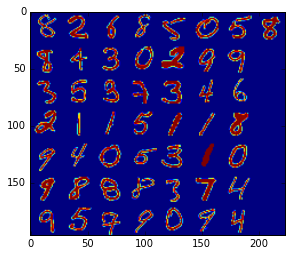

In [5]:
plt.imshow(montage_images(mega_train_subset[0].T.reshape((28,28,1000))[:,:,:50]))

In [9]:
mse_lst_for_diff_C = []
# C_list = [1e-5,1e-2,1,10,100,1000,1e5,1e8,1e10,1e20] 
C_list = [1e-10,1e-8,1e-7,1e-5, 1e-3,1e-2]#,1000,1e5,1e8,1e10] 
for c in C_list:
    print "Testing C={}".format(c)
    mse_err_lst=[]
    for k_th_set in np.arange(k):
        #selecting the kth element for verification set
        verify_data = mega_train_subset[k_th_set]
        verify_labels = mega_labels_subset[k_th_set]
        #select only the ones EXCLUDING the kth element for training
        train_data = np.concatenate((mega_train_subset[:k_th_set-1,:,:],mega_train_subset[k_th_set:,:,:]))
        #Merging all the kth batches into one large datafile 
        train_data =  train_data.reshape((shape( train_data)[0]*batch_size,shape(train_data)[2]))
        train_labels = np.concatenate((mega_labels_subset[:k_th_set-1],mega_labels_subset[k_th_set:]))
        train_labels = train_labels.reshape((shape(train_labels)[0]*batch_size,))
#         print shape(train_labels)[0]*batch_size
#         print shape(train_data)
#         print shape(train_labels)
#         clf = svm.SVC(kernel="linear", C=c)
        clf = svm.LinearSVC(C=c)
        clf.fit(train_data,train_labels)
        result = clf.predict(verify_data)
        mse = benchmark(verify_labels, result)[0]
#         print mse
        mse_err_lst.append(mse)
#     print "average mse: ", mean(mse_err_lst)
    mse_lst_for_diff_C.append(mean(mse_err_lst))

Testing C=1e-10
Testing C=1e-08
Testing C=1e-07
Testing C=1e-05
Testing C=0.001
Testing C=0.01


In [10]:
print C_list
print mse_lst_for_diff_C

[1e-10, 1e-08, 1e-07, 1e-05, 0.001, 0.01]
[0.27789999999999998, 0.1537, 0.11579999999999999, 0.069199999999999998, 0.091599999999999987, 0.097599999999999992]


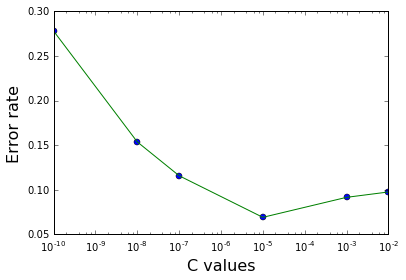

In [13]:
plt.xlabel("C values",fontsize=16)
plt.ylabel("Error rate",fontsize=16)
plt.semilogx(C_list,mse_lst_for_diff_C,'o')
plt.semilogx(C_list,mse_lst_for_diff_C,'-')

In [19]:
ls

benchmark.m  HW1Digits-Copy1.ipynb  HW1Digits_q3.ipynb  hw1.pdf           q1.py
data/        HW1Digits.ipynb        HW1.ipynb           montage_images.m


In [17]:
mse_lst_for_diff_C = []
C_list = [1e-5,5e-5,1e-6,5e-6] 
for c in C_list:
    print "Testing C={}".format(c)
    mse_err_lst=[]
    for k_th_set in np.arange(k):
        #selecting the kth element for verification set
        verify_data = mega_train_subset[k_th_set]
        verify_labels = mega_labels_subset[k_th_set]
        #select only the ones EXCLUDING the kth element for training
        train_data = np.concatenate((mega_train_subset[:k_th_set-1,:,:],mega_train_subset[k_th_set:,:,:]))
        #Merging all the kth batches into one large datafile 
        train_data =  train_data.reshape((shape( train_data)[0]*batch_size,shape(train_data)[2]))
        train_labels = np.concatenate((mega_labels_subset[:k_th_set-1],mega_labels_subset[k_th_set:]))
        train_labels = train_labels.reshape((shape(train_labels)[0]*batch_size,))
#         print shape(train_labels)[0]*batch_size
#         print shape(train_data)
#         print shape(train_labels)
#         clf = svm.SVC(kernel="linear", C=c)
        clf = svm.LinearSVC(C=c)
        clf.fit(train_data,train_labels)
        result = clf.predict(verify_data)
        mse = benchmark(verify_labels, result)[0]
#         print mse
        mse_err_lst.append(mse)
#     print "average mse: ", mean(mse_err_lst)
    mse_lst_for_diff_C.append(mean(mse_err_lst))

Testing C=1e-05
Testing C=5e-05
Testing C=1e-06
Testing C=5e-06


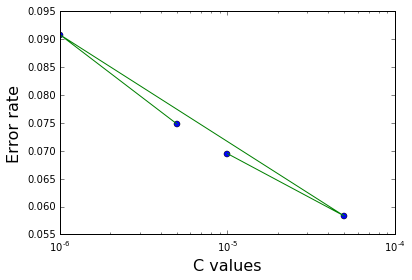

In [18]:
plt.xlabel("C values",fontsize=16)
plt.ylabel("Error rate",fontsize=16)
plt.semilogx(C_list,mse_lst_for_diff_C,'o')
plt.semilogx(C_list,mse_lst_for_diff_C,'-')

In [20]:
mse_lst_for_diff_C = []
C_list = [1e-3,5e-4,3e-4, 1e-4] 
for c in C_list:
    print "Testing C={}".format(c)
    mse_err_lst=[]
    for k_th_set in np.arange(k):
        #selecting the kth element for verification set
        verify_data = mega_train_subset[k_th_set]
        verify_labels = mega_labels_subset[k_th_set]
        #select only the ones EXCLUDING the kth element for training
        train_data = np.concatenate((mega_train_subset[:k_th_set-1,:,:],mega_train_subset[k_th_set:,:,:]))
        #Merging all the kth batches into one large datafile 
        train_data =  train_data.reshape((shape( train_data)[0]*batch_size,shape(train_data)[2]))
        train_labels = np.concatenate((mega_labels_subset[:k_th_set-1],mega_labels_subset[k_th_set:]))
        train_labels = train_labels.reshape((shape(train_labels)[0]*batch_size,))
#         print shape(train_labels)[0]*batch_size
#         print shape(train_data)
#         print shape(train_labels)
#         clf = svm.SVC(kernel="linear", C=c)
        clf = svm.LinearSVC(C=c)
        clf.fit(train_data,train_labels)
        result = clf.predict(verify_data)
        mse = benchmark(verify_labels, result)[0]
#         print mse
        mse_err_lst.append(mse)
#     print "average mse: ", mean(mse_err_lst)
    mse_lst_for_diff_C.append(mean(mse_err_lst))

Testing C=0.001
Testing C=0.0005
Testing C=0.0003
Testing C=0.0001


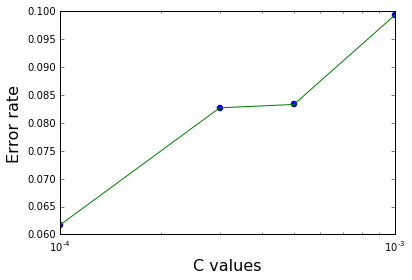

In [21]:
plt.xlabel("C values",fontsize=16)
plt.ylabel("Error rate",fontsize=16)
plt.semilogx(C_list,mse_lst_for_diff_C,'o')
plt.semilogx(C_list,mse_lst_for_diff_C,'-')

In [24]:
mse_lst_for_diff_C = []
C_list = [4e-4,3e-4,1e-4,5e-5,3e-5, 1e-5] 
for c in C_list:
    print "Testing C={}".format(c)
    mse_err_lst=[]
    for k_th_set in np.arange(k):
        #selecting the kth element for verification set
        verify_data = mega_train_subset[k_th_set]
        verify_labels = mega_labels_subset[k_th_set]
        #select only the ones EXCLUDING the kth element for training
        train_data = np.concatenate((mega_train_subset[:k_th_set-1,:,:],mega_train_subset[k_th_set:,:,:]))
        #Merging all the kth batches into one large datafile 
        train_data =  train_data.reshape((shape( train_data)[0]*batch_size,shape(train_data)[2]))
        train_labels = np.concatenate((mega_labels_subset[:k_th_set-1],mega_labels_subset[k_th_set:]))
        train_labels = train_labels.reshape((shape(train_labels)[0]*batch_size,))
#         print shape(train_labels)[0]*batch_size
#         print shape(train_data)
#         print shape(train_labels)
#         clf = svm.SVC(kernel="linear", C=c)
        clf = svm.LinearSVC(C=c)
        clf.fit(train_data,train_labels)
        result = clf.predict(verify_data)
        mse = benchmark(verify_labels, result)[0]
#         print mse
        mse_err_lst.append(mse)
#     print "average mse: ", mean(mse_err_lst)
    mse_lst_for_diff_C.append(mean(mse_err_lst))

Testing C=0.0004
Testing C=0.0003
Testing C=0.0001
Testing C=5e-05
Testing C=3e-05
Testing C=1e-05


In [29]:
C_list

[0.0004, 0.0003, 0.0001, 5e-05, 3e-05, 1e-05]

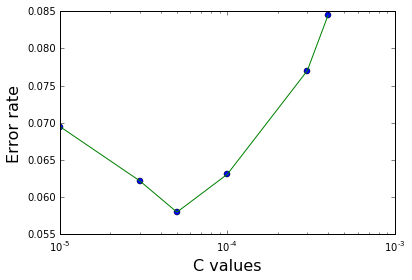

In [28]:
plt.xlabel("C values",fontsize=16)
plt.ylabel("Error rate",fontsize=16)
plt.semilogx(C_list,mse_lst_for_diff_C,'o')
plt.semilogx(C_list,mse_lst_for_diff_C,'-')

In [30]:
mse_lst_for_diff_C = []
C_list = [4.5e-5,5e-5,5.2e-5,5.5e-5,5.7e-5,6e-5] 
for c in C_list:
    print "Testing C={}".format(c)
    mse_err_lst=[]
    for k_th_set in np.arange(k):
        #selecting the kth element for verification set
        verify_data = mega_train_subset[k_th_set]
        verify_labels = mega_labels_subset[k_th_set]
        #select only the ones EXCLUDING the kth element for training
        train_data = np.concatenate((mega_train_subset[:k_th_set-1,:,:],mega_train_subset[k_th_set:,:,:]))
        #Merging all the kth batches into one large datafile 
        train_data =  train_data.reshape((shape( train_data)[0]*batch_size,shape(train_data)[2]))
        train_labels = np.concatenate((mega_labels_subset[:k_th_set-1],mega_labels_subset[k_th_set:]))
        train_labels = train_labels.reshape((shape(train_labels)[0]*batch_size,))
#         print shape(train_labels)[0]*batch_size
#         print shape(train_data)
#         print shape(train_labels)
#         clf = svm.SVC(kernel="linear", C=c)
        clf = svm.LinearSVC(C=c)
        clf.fit(train_data,train_labels)
        result = clf.predict(verify_data)
        mse = benchmark(verify_labels, result)[0]
#         print mse
        mse_err_lst.append(mse)
#     print "average mse: ", mean(mse_err_lst)
    mse_lst_for_diff_C.append(mean(mse_err_lst))

Testing C=4.5e-05
Testing C=5e-05
Testing C=5.2e-05
Testing C=5.5e-05
Testing C=5.7e-05
Testing C=6e-05


(4.5e-05, 5.3e-05)

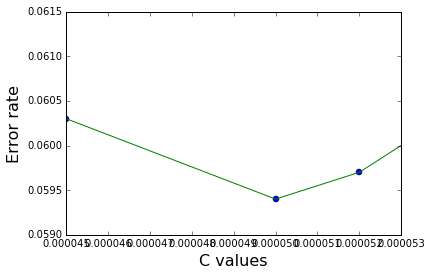

In [40]:
plt.xlabel("C values",fontsize=16)
plt.ylabel("Error rate",fontsize=16)
plt.plot(C_list,mse_lst_for_diff_C,'o')
plt.plot(C_list,mse_lst_for_diff_C,'-')
plt.xlim(4.5e-5,5.3e-5)

best C values is 5e-5 for N=10000 dataset 

In [66]:
digit_data_test = scipy.io.loadmat("data/digit-dataset/test.mat")
digit_data_train = scipy.io.loadmat("data/digit-dataset/train.mat")

test_img= digit_data_test['test_images'].T
train_img= digit_data_train['train_images']
train_label= digit_data_train['train_labels']

In [68]:
print shape(train_img)
print shape(test_img)

(28, 28, 60000)
(28, 28, 10000)


In [71]:
test_img_flat=[]
for i in np.arange(shape(test_img)[2]):
    test_img_flat.append(test_img[:,:,i].flatten())
test_img_flat= np.array(test_img_flat)

In [72]:
shape(test_img_flat)

(10000, 784)

In [73]:
clf = svm.LinearSVC(C=5e-5)
clf.fit(train_data,train_labels)

LinearSVC(C=5e-05, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [75]:
result = clf.predict(test_img_flat)

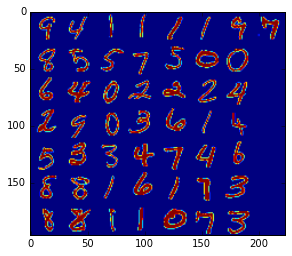

In [87]:
plt.imshow(montage_images(test_img_flat.T.reshape((28,28,10000))[:,:,:50]))

In [88]:
result[:50]

array([9, 5, 6, 2, 9, 5, 1, 4, 5, 4, 9, 0, 8, 8, 1, 5, 0, 0, 3, 1, 9, 1, 7,
       2, 3, 4, 6, 1, 1, 5, 9, 6, 7, 1, 0, 1, 0, 2, 1, 4, 7, 7, 9, 0, 9, 4,
       6, 3, 7, 7], dtype=uint8)

In [94]:
np.arange(1,10001)

array([    1,     2,     3, ...,  9998,  9999, 10000])

In [104]:
a = numpy.array([np.arange(1,10001),result],dtype=np.int64).T
print shape(a)
numpy.savetxt("Submission.csv", a, delimiter=",",fmt='%i')

(10000, 2)


### Training with 60000 images to increase Kaggle score. 

In [122]:
print shape(train_img_flat)
print shape(train_label[:,0])

(60000, 784)
(60000,)


In [123]:
clf = svm.LinearSVC(C=5e-5)
clf.fit(train_img_flat,train_label[:,0])

LinearSVC(C=5e-05, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [124]:
result =  clf.predict(test_img_flat)

In [133]:
a = numpy.array([np.arange(1,10001),result],dtype=np.int64).T
print shape(a)
numpy.savetxt("Submission.csv", a, delimiter=",",fmt='%i')

(10000, 2)


Now it went up from 0.83280 to  0.88520 ! 

#References

- "1.4. Support Vector Machines." 1.4. Support Vector Machines — _Scikit-learn 0.17 Documentation_. N.p., n.d. Web. 01 Feb. 2016.
- Markham, Kevin. "Simple Guide to Confusion Matrix Terminology." _Data School_. N.p., 25 Mar. 2014. Web. 01 Feb. 2016.
- "Confusion Matrix." Confusion Matrix — _Scikit-learn 0.17 Documentation_. N.p., n.d. Web. 02 Feb. 2016.
- James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. "Chapter 5 Resampling Methods." _An Introduction to Statistical Learning: With Applications in R_. N.p.: Springer, n.d. 180-83. Print.